##### Digital Analytics
## A/B Test Report

Berta Olivier Cañadell

### Introduction and Theoretical Justification

Cineville is a Dutch platform that aims to make more people go to the cinema by offering a fixed monthly subscription. Members can watch an unlimited number of films across 70 different movie theaters in the Netherlands.
Additionally the platform provides the option to filter films that are not in English but are presented with English subtitles. A feature that aims to reach the international audience residing in the country who do not speak Dutch.
When a user first opens the Cineville website, all the information is entirely in Dutch, although it's not difficult to find the english option even if you don't understand Dutch, it would likely be more convenient for non-dutch users to see this possibility in the menu alongside the other tabs. The goal of upgrading this feature would be to improve the non-Dutch speakers’ user experience, allowing them to find the platform’s offers and subscription options more quickly.


#### Theoretical framework

According to the theory of the Information Architecture (IA) (Morville & Rosenfeld, 2006), it is important that the content of a website is well organized and categorized to help users navigate it easily and provide them with the information they’re looking for or allow them to achieve their goal (e.g. purchase an item). The design of a website thus, has an influence on the so called user experience (UX), which ISO (2010) defines as the “person’s perceptions and responses resulting from the use and/or anticipated use of a product, system or service”. So in order to ensure that non-dutch users can find what Cineville is and its offers in an easier and quicker way, this study aims to respond the following research question: 

**RQ:** *To what extent does the addition of a new tab offering an English version of Cineville increase the user subscriptions?*

Hypothesis:

* **H1:** The addition of a new tab offering an English version of Cineville will increase subscription sign-ups by non-dutch users. 



#### What do I need to do with my data?
I need the following variables:

**IV** 

* A/B test: Offering (or not) an English version of Cineville
* User's country of origin: I will use it as a control variable since we're interested in seeing the behaviour of non-dutch --> We will have to create a category. 
* User's IP: I will also take it as a control variable to see how many users were in the NL when they visited the website.
* Time spent on the website: I will also take it as a control variable because this can indicate whether users found what they we're looking for faster or slower. For example, if a non-dutch user that had the english tab version spent little time and purchased the pass. Or on the contrary, if if a non-dutch user that didn't have the english tab version spent more time and didn't end up purchasing the pass.

**DV**
  
* Purchase (**DV**): purchase of a Cineville pass. It's the outcome of offering (or not) an English version of Cineville

### Gathering Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Above I'm loading all the packages we will need to work with our data. The first module I'm importing is the library ```Pandas``` that will allow me to read and work with my datasets. The second module I'm importing is ```Seaborn```, which I need to make the different visualizations from the data. Third, I use the function ```pd.set_option``` to make sure Pandas displays entire numbers, otherwise results would be shown in mathematical notation. Lastly, I use the command ```%matplotlib inline``` to make sure the visualizations will be displayed in this notebook directly so that we can see them. 

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install conda

Note: you may need to restart the kernel to use updated packages.


Above, I'm using the command ```pip install``` to make sure I will be able to use the package from **Seaborn** and **Anaconda** later on.

In [4]:
pip install scikit-learn statsmodels numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


Above, I'm using the command ```pip install``` to make sure I will be able to use the packages from **scikit-learn** and **lime**.

In [6]:
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm                                           
import numpy as np  

In [7]:
import lime 
from lime import lime_tabular 

Above I'm importing **scikit-learn** and **lime**. Scikit-learn is a machine learning library and we're specifically importing linear and logistic regressions that will allow us to train and evaluate our models. Lime is another library that allows us to see the predictions made by machine learning models. I specifically imported ```lime_tabular``` to make sure I will be able to work with tabular data.



In [8]:
df_sessions = pd.read_json('/Users/bertaolivier/Desktop/DA_Files/A:B Test Report/OlivierCanadell_Berta_session_info.jsonl', lines=True)

In [9]:
df_users = pd.read_pickle('/Users/bertaolivier/Desktop/DA_Files/A:B Test Report//OlivierCanadell_Berta_session_info_users.pkl.gz')

In [10]:
df_ABtest = pd.read_pickle('/Users/bertaolivier/Desktop/DA_Files/A:B Test Report/OlivierCañadell_Berta_session_info.pkl.gz')

Above I'm loading and naming my three datasets.

In [11]:
len(df_sessions)

6393

In [12]:
df_sessions.columns

Index(['sessions_info'], dtype='object')

Here I can see something is weird because there is only one column.

In [13]:
df_sessions.head()

,sessions_info
0,"{'view': 1.0, 'time': 2.0, '_purchase': 1.0, '..."
1,"{'view': 1.0, 'time': 4.4, '_purchase': 1.0, '..."
2,"{'view': 1.0, 'time': 2.0, '_purchase': 1.0, '..."
3,"{'view': 1.0, 'time': 14.640000000000002, '_pu..."
4,"{'view': 1.0, 'time': 6.0, '_purchase': 1.0, '..."


I used ```.head``` to see the first five rows of the dataset and I can see what's happening. The column contains a dictionary with multiple variables about the website information, so I need to 'unpack' it to be able to have a table with all these variables.

In [14]:
df_sessions = pd.json_normalize(df_sessions['sessions_info'])

I used the function ```.json_normalize``` which allowed me to 'unpack' the dataset. I was able to use this function following the tutorial from DA2.

In [15]:
df_sessions.columns

Index(['view', 'time', '_purchase', 'purchase_amount', 'id'], dtype='object')

In [16]:
df_sessions.head()

,view,time,_purchase,purchase_amount,id
0,1.0,2.00,1.0,6.000000,22308
1,1.0,4.40,1.0,19.546154,22309
2,1.0,2.00,1.0,6.000000,22310
3,1.0,14.64,1.0,65.035385,22311
4,1.0,6.00,1.0,26.653846,22314


Above, using ```.columns``` and ```.head``` I can see that my function worked and that *df_sessions* now has all the variables.

In [17]:
len(df_sessions)

6393

In [18]:
df_sessions.dtypes

view               float64
time               float64
_purchase          float64
purchase_amount    float64
id                   int64
dtype: object

In [19]:
df_sessions.isna().sum()

view               0
time               0
_purchase          0
purchase_amount    0
id                 0
dtype: int64

In [20]:
df_sessions[['time','_purchase']].describe()

,time,_purchase
count,6393.000000,6393.0
mean,8.255254,1.0
std,7.688630,0.0
min,2.000000,1.0
25%,2.000000,1.0
50%,5.360000,1.0
75%,12.240000,1.0
max,52.000000,1.0


After unpacking *df_sessions* I check again the length (```len```) and the type of data (```.dtypes```), which I can see is numeric (floats and integers) and I check if there are missing values (```.isna().sum()```) which looks like there aren't. 

So in this first dataset, *df_sessions*, I have information about the Cineville website. For now I can see it contains relevant variables that I will need to answer my RQ, such as my DV variable and an independent one. I run the command ```.describe()``` on these specific variables  and I can see that on average a user spends 8.25 minutes in the website, a minimum of 2 and a maximum of 52. I can also see that my the 'purchase' variable is binary and that I only have information about the people who purchased, so this is also something I need to take into account later.

In [21]:
len(df_users)

13046

In [22]:
df_users.columns

Index(['user_country_of_origin', 'id'], dtype='object')

In [23]:
df_users.head()

,user_country_of_origin,id
1159,NaN,1159
6593,NaN,6593
3472,NaN,3472
8954,SM,8954
14433,NL,14433


In [24]:
df_users.isna().sum()

user_country_of_origin    5435
id                           0
dtype: int64

In [25]:
df_users.dtypes

user_country_of_origin    object
id                        object
dtype: object

In [202]:
df_users['user_country_of_origin'].value_counts()

user_country_of_origin
NL    3810
MR      31
TR      30
FI      30
JM      30
      ... 
PS      11
CI      11
AT       9
GR       8
MA       8
Name: count, Length: 195, dtype: int64

Above, I'm exploring my second dataset, *df_users*, containing information about users who visited Cineville. In this case I can see there are only two columns referring to the user id and the country of origin of the user. However I can see there are a lot of missing values in 'user_country_of_origin', which is something I will have to bear in mind. So I will write it down to make sure I don't forget. I also see in this case the variables are objects. Finally I can tell a majority of the users in my dataset are from the Netherlands, which can potentially limit my study. 

**NOTE** see how to handle NaN from *'user_country_of_origin'*. + create a variable for non-dutch users.

In [27]:
len(df_ABtest)

16307

In [28]:
df_ABtest.columns

Index(['session_timestamp', 'device', 'ABtest', 'referral',
       'geoNetwork_country', 'screenresolution', 'sessioninfo_id', 'userid'],
      dtype='object')

In [29]:
df_ABtest.head()

,session_timestamp,device,ABtest,referral,geoNetwork_country,screenresolution,sessioninfo_id,userid
0,2023-02-08 06:07:48,Mozilla/5.0 (Windows NT 4.0) AppleWebKit/533.1...,version_A,tikto.com,NL,2560 1080,22307,0
1,2023-02-05 10:09:37,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,NaN,https://coffey.com/,NaN,2048 1536,22308,1
2,2023-02-02 08:00:09,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_3 rv...,NaN,tikto.com,NaN,1600 900,22309,2
3,2023-02-13 09:13:16,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_8...,ver_B,kayak.com,NL,1920 1200,22310,3
4,2023-02-03 21:16:01,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_9...,ver_B,google.com,LB,1024 768,22311,4


In [30]:
df_ABtest.isna().sum()

session_timestamp        0
device                   0
ABtest                3959
referral                 0
geoNetwork_country    7002
screenresolution         0
sessioninfo_id           0
userid                   0
dtype: int64

In [31]:
df_ABtest.dtypes

session_timestamp     object
device                object
ABtest                object
referral              object
geoNetwork_country    object
screenresolution      object
sessioninfo_id        object
userid                object
dtype: object

In [32]:
df_ABtest['ABtest'].value_counts()

ABtest
ver_B        6237
version_A    6111
Name: count, dtype: int64

In [33]:
df_ABtest['geoNetwork_country'].value_counts()

geoNetwork_country
NL    4636
GN      40
BN      39
TR      37
CO      36
      ... 
CH      15
UY      14
KP      14
NG      11
SD       9
Name: count, Length: 195, dtype: int64

Above I'm exploring my third datset, *df_ABtest*, which contains the results from the A/B test as well as other relevant information to answer my RQ. I run ```.value_counts``` to further explore the dataset and I can see that more people, 6237, did the test with the version that didn't include the english tab (ver_B), whereas 6111 persons did the test with the version that had the feature (ver_A) we want to test. 

**ANSWER:** In this section we explored the three datasets we're going to use to answer our RQ. This analysis aims to examine if adding a new tab in the main menu of Cineville indicating that the information is also available in English, will lead to more subscriptions. This is why the category user country of origin is relevant because we assume that the change in this feature would only have an impact in non-dutch speakers. However the data was gathered through Google Analytics which can present some biases and imbalances. For instance it seems like the dutch population is overrepresented the largest so there could be an overrepresentation. There are also many missing values, so that can end up affecting the results and findings. Another bias in the sample is that the data Digital Analytics gathers is only when users accept the cookies when accessing the website, therefore there’s data that we’re probably missing. 

### Data Cleaning

After exploring the three datasets, I can see I need to work with the three of them to answer my RQ, since they all include relevant variables. To answer my RQ I'm interested in the following variables:
* 'user_country_of_origin' --> from *df_users* (IV)
* 'purchase' --> from *df_sessions* (DV)
* 'time' --> from *df_sessions* (IV)
* 'ABtest --> from *df_ABtest* (IV)
* 'geoNetwork_country' --> from *df_ABtest* (IV)

In [34]:
df_sessions.columns

Index(['view', 'time', '_purchase', 'purchase_amount', 'id'], dtype='object')

In [35]:
df_sessions['id'].value_counts() 

id
22308    1
33295    1
33293    1
33292    1
33290    1
        ..
27774    1
27773    1
27770    1
27767    1
38612    1
Name: count, Length: 6393, dtype: int64

In [36]:
df_sessions.dtypes

view               float64
time               float64
_purchase          float64
purchase_amount    float64
id                   int64
dtype: object

In [37]:
df_users.columns

Index(['user_country_of_origin', 'id'], dtype='object')

In [38]:
df_users['id'].value_counts()

id
1159     1
2345     1
16124    1
12050    1
11909    1
        ..
14325    1
9102     1
1986     1
6722     1
6455     1
Name: count, Length: 13046, dtype: int64

In [39]:
df_users.dtypes

user_country_of_origin    object
id                        object
dtype: object

In [40]:
df_ABtest.columns

Index(['session_timestamp', 'device', 'ABtest', 'referral',
       'geoNetwork_country', 'screenresolution', 'sessioninfo_id', 'userid'],
      dtype='object')

In [41]:
df_ABtest['userid'].value_counts()

userid
0        1
10876    1
10863    1
10864    1
10865    1
        ..
5440     1
5441     1
5442     1
5443     1
16306    1
Name: count, Length: 16307, dtype: int64

In [42]:
df_ABtest['sessioninfo_id'].value_counts()

sessioninfo_id
22307    1
33183    1
33170    1
33171    1
33172    1
        ..
27747    1
27748    1
27749    1
27750    1
38613    1
Name: count, Length: 16307, dtype: int64

In [43]:
df_ABtest.dtypes

session_timestamp     object
device                object
ABtest                object
referral              object
geoNetwork_country    object
screenresolution      object
sessioninfo_id        object
userid                object
dtype: object

Above, by using the functions ```.columns``` to see what are the common identifiers in each dataset. I can see that in *df_sessions* 'id' refers to the session id, whereas in *df_users*, 'id' refers to user id. In *df_ABtest* I see there are two variables for 'id', one referring to user id and another to session id. Seeing this I know I can perform a merge using these variables.

I also applied the function ```.value_counts()```, specifying the variable name represening the column 'ID' of each dataset, to check if id values are unique in each dataset, which is something I need to know before merging. I can see they are indeed unique.

Finally, I used the function ```.dtypes``` once again to see what kind of data 'id' is for each dataset. I can see in df_sessions it's a numeric value, whereas in df_users and df_ABtest they are objects. I will have to change that.

In [44]:
df_users = df_users.rename(columns={'id':'userid'})

In [45]:
df_sessions = df_sessions.rename(columns={'id':'sessioninfo_id'})

Above I'm renaming the 'id' columns from *df_users* and *df_sessions* to give them the same name as the columns in *df_ABtest*, which I need for the merging. 

In [46]:
df_users['userid'] = df_users['userid'].apply(pd.to_numeric)

In [47]:
df_ABtest['userid'] = df_ABtest['userid'].apply(pd.to_numeric)

In [48]:
df_ABtest['sessioninfo_id'] = df_ABtest['sessioninfo_id'].apply(pd.to_numeric)

After renaming some columns, what I'm doing above is to change the datatype of the common identifiers by using the ```.apply``` method. I specifically changed 'userid' from *df_users* and 'userid' and 'sessioninfo_id' from *df_ABtest*. Now that I know the values are unique, they have the same name in both dataframes and they are the same datatype I'm ready to do the merge. 

I will start merging *df_ABtest* and *df_sessions*.

In [49]:
df_merged=df_ABtest.merge(df_sessions, on='sessioninfo_id', how='left')

In [50]:
len(df_merged), len(df_ABtest),len(df_sessions)

(16307, 16307, 6393)

In [51]:
df_merged.isna().sum()

session_timestamp        0
device                   0
ABtest                3959
referral                 0
geoNetwork_country    7002
screenresolution         0
sessioninfo_id           0
userid                   0
view                  9914
time                  9914
_purchase             9914
purchase_amount       9914
dtype: int64

In [52]:
df_merged.head()

,session_timestamp,device,ABtest,referral,geoNetwork_country,screenresolution,sessioninfo_id,userid,view,time,_purchase,purchase_amount
0,2023-02-08 06:07:48,Mozilla/5.0 (Windows NT 4.0) AppleWebKit/533.1...,version_A,tikto.com,NL,2560 1080,22307,0,NaN,NaN,NaN,NaN
1,2023-02-05 10:09:37,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,NaN,https://coffey.com/,NaN,2048 1536,22308,1,1.0,2.00,1.0,6.000000
2,2023-02-02 08:00:09,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_3 rv...,NaN,tikto.com,NaN,1600 900,22309,2,1.0,4.40,1.0,19.546154
3,2023-02-13 09:13:16,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_8...,ver_B,kayak.com,NL,1920 1200,22310,3,1.0,2.00,1.0,6.000000
4,2023-02-03 21:16:01,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_9...,ver_B,google.com,LB,1024 768,22311,4,1.0,14.64,1.0,65.035385


Above I used the command ```.merge``` to merge *df_ABtest* and *df_sessions*. I did the merging on the left because I know we have more data in *df_ABtest* than *df_sessions* and I want to keep all the information from *df_ABtest*, which contains my DV. Later on I applied the function ```len``` to compare the merged dataset with the datasets I used and I see I didn't lose data.

I later applied ```.isna().sum()``` to see the missing values. In this case I can see I have a lot of missing values in 'view', 'time', 'purchase' and 'purchase_amount'. So I will have to do something about it. 

But first I will merge this df with *df_users*.

In [53]:
df_merged= df_merged.merge(df_users, on='userid', how='left')

In [54]:
len(df_merged)

16307

In [55]:
df_merged.head()

,session_timestamp,device,ABtest,referral,geoNetwork_country,screenresolution,sessioninfo_id,userid,view,time,_purchase,purchase_amount,user_country_of_origin
0,2023-02-08 06:07:48,Mozilla/5.0 (Windows NT 4.0) AppleWebKit/533.1...,version_A,tikto.com,NL,2560 1080,22307,0,NaN,NaN,NaN,NaN,NaN
1,2023-02-05 10:09:37,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,NaN,https://coffey.com/,NaN,2048 1536,22308,1,1.0,2.00,1.0,6.000000,NL
2,2023-02-02 08:00:09,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_3 rv...,NaN,tikto.com,NaN,1600 900,22309,2,1.0,4.40,1.0,19.546154,NaN
3,2023-02-13 09:13:16,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_8...,ver_B,kayak.com,NL,1920 1200,22310,3,1.0,2.00,1.0,6.000000,NaN
4,2023-02-03 21:16:01,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_9...,ver_B,google.com,LB,1024 768,22311,4,1.0,14.64,1.0,65.035385,NaN


Above I used the command ```.merge``` to merge *df_merged* and *df_users* using the common identifier 'userid'. Again I did a left merging to keep the common rows form *df_merged* and *df_users* but also those from *df_merged* that are not present in *df_users*. Nevertheless this means there will probably be a lot of missing values. Let's have a look:

Before I forget, I rename the column 'device' to 'browser' since this makes it more clear. 

In [56]:
df_merged.isna().sum()

session_timestamp            0
device                       0
ABtest                    3959
referral                     0
geoNetwork_country        7002
screenresolution             0
sessioninfo_id               0
userid                       0
view                      9914
time                      9914
_purchase                 9914
purchase_amount           9914
user_country_of_origin    8696
dtype: int64

I can see indeed the merging added lot of missing values in 'user_country_of_origin'. So as we already said before, we need to think of a solution to handle the missing values later on.

#### Data minimization

In [57]:
df_min = df_merged[['userid','sessioninfo_id','user_country_of_origin','geoNetwork_country',
                    '_purchase','time','ABtest']]

After merging my three datasets, what I did above is to create a minimized dataframe containing only my key variables. So from *df_merged* I selected only my IV and DVs and I created a new dataset, *df_min*, which I'm gonna use to work from now on.

In [58]:
df_min.to_pickle('minimized_data.pkl')

Above I'm creating a pickle file to save my minimized data as an independent file, so it can be reused.

In [59]:
df_min.columns

Index(['userid', 'sessioninfo_id', 'user_country_of_origin',
       'geoNetwork_country', '_purchase', 'time', 'ABtest'],
      dtype='object')

In [60]:
df_min.head()

,userid,sessioninfo_id,user_country_of_origin,geoNetwork_country,_purchase,time,ABtest
0,0,22307,NaN,NL,NaN,NaN,version_A
1,1,22308,NL,NaN,1.0,2.00,NaN
2,2,22309,NaN,NaN,1.0,4.40,NaN
3,3,22310,NaN,NL,1.0,2.00,ver_B
4,4,22311,NaN,LB,1.0,14.64,ver_B


In [61]:
len(df_min)

16307

In [62]:
df_min.dtypes

userid                      int64
sessioninfo_id              int64
user_country_of_origin     object
geoNetwork_country         object
_purchase                 float64
time                      float64
ABtest                     object
dtype: object

In [63]:
df_min.isna().sum()

userid                       0
sessioninfo_id               0
user_country_of_origin    8696
geoNetwork_country        7002
_purchase                 9914
time                      9914
ABtest                    3959
dtype: int64

After creating my minimized data I explored it. As usual I used the different functions ```.columns```, ```.head()```, ```len```,```.dtypes``` and ```.isna().sum()``` to see what I have. I can clearly see I have a problem with missing values. All my variables except for 'userid' and 'sessioninfo_id' have a lot of missing values so I need to do something about it.

#### Handling missing values & transforming variables

In [64]:
df_min['_purchase'].value_counts()   

_purchase
1.0    6393
Name: count, dtype: int64

I start exploring the variables that have missing values one by one. If I apply the function ```.value_counts()``` into my DV, 'purchase', because it's a binary variable. I can see I don't have users who didn't purchase (0).

In [65]:
df_min['_purchase']= df_min['_purchase'].fillna(0)

/var/folders/6s/7szhx2dx0s591k39lzg6sgsh0000gn/T/ipykernel_5561/84165964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min['_purchase']= df_min['_purchase'].fillna(0)


What I did above is to use the function ```.fillna(0)``` so that pandas places a 0 in each of the rows in 'purchase' that contain a NaN value. I did so because I can say that if 1 = to making a purchase, then 0 = to not having bought any item.

In [66]:
df_min['_purchase'].value_counts()   

_purchase
0.0    9914
1.0    6393
Name: count, dtype: int64

I applied again ```.value_counts()``` to check if it worked and I can see the function worked. 

In [67]:
def check_category(source, variablename):
    if source == variablename:
        return 1
    return 0

In [68]:
df_min['NL'] = df_min['user_country_of_origin'].apply(check_category, args=('NL',))

/var/folders/6s/7szhx2dx0s591k39lzg6sgsh0000gn/T/ipykernel_5561/3498412951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min['NL'] = df_min['user_country_of_origin'].apply(check_category, args=('NL',))


What I did above is to use the function ```.check_category``` to check for the **'NL'** value in the column **'user_country_of_origin'**. We then applied (```.apply```) the function to *df_min* to create a new binary category that returns 1 if the user is from the NL or 0 if they're not.

In [69]:
def generate_other(row):
    if row['NL'] == 1:
        row['other_country'] = 0
    else:
        row['other_country'] = 1
    return row

In [70]:
df_min = df_min.apply(generate_other, axis=1)

What I did above is to use another function: ```.generate_other``` to create a new variable that does the opposite of the one we created before. So basically in this column every value from the column **'NL'** that has a 0 (meaning the user is not dutch), takes the value 1, assigning **'other_country'** to every country that's not the NL. After creating this function I applied (.apply) to *df_min* to create a new binary category. So we now have two new columns: **'other_country'** and **'NL'**. 

In [71]:
def generate_category(row):
    if row['NL'] == 1:
        row['cat_user_country'] = 'NL'
    if row['other_country'] == 1:
        row['cat_user_country'] = 'other'
    return row

In [72]:
df_min = df_min.apply(generate_category, axis=1)

After creating the binary categories 'NL' and 'other_countries', I used the function ```generate_category``` to create a categorical variable that takes the values from these two columns in its rows. So what it's doing is to check if the value 'NL' is equal to 1 or 0 and depending on that, it assigns the value 'NL' or 'other_country' to indicate if the user is from the Netherlands or not. 

In [73]:
df_min[['NL','other_country']].describe()

,NL,other_country
count,16307.000000,16307.000000
mean,0.233642,0.766358
std,0.423160,0.423160
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [74]:
df_min[['cat_user_country']].value_counts(normalize=True)

cat_user_country
other               0.766358
NL                  0.233642
Name: proportion, dtype: float64

I used ```.describe()``` and ```.value_counts()``` to see the distribution of the new categories I created. I can see that 76.6% of users are from a different country, and that only 23% are dutch. 

In [75]:
df_min['original_version'] = df_min['ABtest'].apply(check_category, args=('version_A',))
df_min['test_version'] = df_min['ABtest'].apply(check_category, args=('ver_B',))

Using the same function that I used to create the categories for 'NL' and 'other country' I also did the same to have two separate columns for each version of the A/B test. This way I can later compare the **'original'** and the **'test version'** separately with my other variables.

In [76]:
df_min.head()

,userid,sessioninfo_id,user_country_of_origin,geoNetwork_country,_purchase,time,ABtest,NL,other_country,cat_user_country,original_version,test_version
0,0,22307,NaN,NL,0.0,NaN,version_A,0,1,other,1,0
1,1,22308,NL,NaN,1.0,2.00,NaN,1,0,NL,0,0
2,2,22309,NaN,NaN,1.0,4.40,NaN,0,1,other,0,0
3,3,22310,NaN,NL,1.0,2.00,ver_B,0,1,other,0,1
4,4,22311,NaN,LB,1.0,14.64,ver_B,0,1,other,0,1


Following the steps we did in DA5, what I did above is to use different functions to create new categories within the variable **'user_country_of_origin'**. Since for my RQ I'm specifically interested in differentiating between dutch and non-dutch people, I took the values from 'user_country_of_origin' and I created a category that specified if the user was from **'NL'** or from any **'other'** country. After creating the new variables I checked (```.head()```) how *df_min* looks like.

Nevetheless I still have other missing values I need to handle. Let's see how they look like:

In [77]:
df_min.isna().sum()

userid                       0
sessioninfo_id               0
user_country_of_origin    8696
geoNetwork_country        7002
_purchase                    0
time                      9914
ABtest                    3959
NL                           0
other_country                0
cat_user_country             0
original_version             0
test_version                 0
dtype: int64

When checking the **missing values** I see I still have some in **'user_country_of_origin'**, **'geoNetwork_country'**, **'time'**, and **'ABtest'**. I think droping them throgh the function ```.dropna()``` would be a bit risky since they are relevant variables for my RQ. Therefore I will take another approach.

In [78]:
df_min['user_country_of_origin'] = df_min['user_country_of_origin'].fillna('not provided')

In [79]:
df_min['user_country_of_origin'].isna().sum()

0

In [80]:
df_min['user_country_of_origin'].value_counts()

user_country_of_origin
not provided    8696
NL              3810
MR                31
JM                30
FI                30
                ... 
CI                11
HN                11
AT                 9
MA                 8
GR                 8
Name: count, Length: 196, dtype: int64

Following the video about how to handle missing values from the FAQ in this course, what I'm doing with the function above is telling pandas to fill the missing values from the column **'user_country_of_origin'** with **'not provided'**. This function is overwritting the values in the original dataset. After applying the function, I checked again the missing values and I can see the variable 'user_country_of_origin' doesn't have any missing values anymore. When I check for ```.value_counts()``` I can indeed see that in 8696 cases, the user country of origin is not provided. I will do the same with the variable 'geoNetwork_country'.   

In [81]:
df_min['geoNetwork_country'] = df_min['geoNetwork_country'].fillna('not provided')

In [82]:
df_min['geoNetwork_country'].isna().sum()

0

In [83]:
df_min['geoNetwork_country'].value_counts()

geoNetwork_country
not provided    7002
NL              4636
GN                40
BN                39
TR                37
                ... 
ZM                15
UY                14
KP                14
NG                11
SD                 9
Name: count, Length: 196, dtype: int64

I applied the exact same process with the variable 'geoNetwork_country' and when cheking it, I can see it worked, and that in 7002 cases, 'geoNetwork_country' is not provided.

In [84]:
df_min.isna().sum()

userid                       0
sessioninfo_id               0
user_country_of_origin       0
geoNetwork_country           0
_purchase                    0
time                      9914
ABtest                    3959
NL                           0
other_country                0
cat_user_country             0
original_version             0
test_version                 0
dtype: int64

I'm checking the missing values in *df_min* overall and I see I still have some in the 'ABtest' and 'time' variables. So let's see what I can do.

In [85]:
df_final = df_min.dropna(subset=['ABtest'])

In [86]:
len(df_min),len(df_final)

(16307, 12348)

In [87]:
df_final.isna().sum()

userid                       0
sessioninfo_id               0
user_country_of_origin       0
geoNetwork_country           0
_purchase                    0
time                      8398
ABtest                       0
NL                           0
other_country                0
cat_user_country             0
original_version             0
test_version                 0
dtype: int64

I decided to use the ```.dropna``` function to get rid of the missing values in **'ABtest'** column since I'm not interested in having them in mydataset as the **'ABtest'** variable is my DV, so the missing values in this case are not relevant to keep. I doubled checked again the remaining missing values (```.isna().sum()```) to see if the function worked and it did.

In [88]:
df_final['time'] = df_final['time'].fillna('not provided')

/var/folders/6s/7szhx2dx0s591k39lzg6sgsh0000gn/T/ipykernel_5561/82199571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['time'] = df_final['time'].fillna('not provided')


In [89]:
df_final['time'].isna().sum()

0

In [90]:
df_final.isna().sum()

userid                    0
sessioninfo_id            0
user_country_of_origin    0
geoNetwork_country        0
_purchase                 0
time                      0
ABtest                    0
NL                        0
other_country             0
cat_user_country          0
original_version          0
test_version              0
dtype: int64

To handle the missing values for **'time'** I ended up using the same function as 'user_country_of_origin' and 'geoNetwork_country', so I used ```.fillna``` to fill the missing values from this variable with **'not provided'**. 

In [91]:
df_final.head()

,userid,sessioninfo_id,user_country_of_origin,geoNetwork_country,_purchase,time,ABtest,NL,other_country,cat_user_country,original_version,test_version
0,0,22307,not provided,NL,0.0,not provided,version_A,0,1,other,1,0
3,3,22310,not provided,NL,1.0,2.0,ver_B,0,1,other,0,1
4,4,22311,not provided,LB,1.0,14.64,ver_B,0,1,other,0,1
6,6,22313,TG,not provided,0.0,not provided,version_A,0,1,other,1,0
8,8,22315,not provided,NL,0.0,not provided,version_A,0,1,other,1,0


In [92]:
df_final.reset_index(drop=True, inplace=True)

In [93]:
df_final.head()

,userid,sessioninfo_id,user_country_of_origin,geoNetwork_country,_purchase,time,ABtest,NL,other_country,cat_user_country,original_version,test_version
0,0,22307,not provided,NL,0.0,not provided,version_A,0,1,other,1,0
1,3,22310,not provided,NL,1.0,2.0,ver_B,0,1,other,0,1
2,4,22311,not provided,LB,1.0,14.64,ver_B,0,1,other,0,1
3,6,22313,TG,not provided,0.0,not provided,version_A,0,1,other,1,0
4,8,22315,not provided,NL,0.0,not provided,version_A,0,1,other,1,0


After cleaning all my data and displaying the first 5 rows (```.head()```), I can see that the index of my dataset is not in order, so I applied the ```.reset_index``` function to remove the current index and replace it with a structured order. Now I can finally see how my clean dataset looks like.

### Data Exploration & Evaluation

* Descriptives and definitions of all key variables

In [94]:
df_final.columns

Index(['userid', 'sessioninfo_id', 'user_country_of_origin',
       'geoNetwork_country', '_purchase', 'time', 'ABtest', 'NL',
       'other_country', 'cat_user_country', 'original_version',
       'test_version'],
      dtype='object')

Now that we have cleaned the data we can see more clearly what our key variables are. So we need to explore them to see what information we can get:

In [95]:
df_final['ABtest'].value_counts()

ABtest
ver_B        6237
version_A    6111
Name: count, dtype: int64

In [96]:
df_final[['test_version', 'original_version']].value_counts()

test_version  original_version
1             0                   6237
0             1                   6111
Name: count, dtype: int64

**'ABtest'** is our **independent variable** and it includes two values:
* 'ver_A' or 'original_version': this version is just the current version of Cineville, so it's the control version. 6111 users visited it.
* 'ver_B' or 'test_version': this version includes a tab that offers the english version of Cineville. According to the ```.value_counts()``` 6237 users saw this version of the website, which is the test one.

We can also see that more people saw the test version than the original version, so this is already creating an imbalance.

In [97]:
df_final['cat_user_country'].value_counts()

cat_user_country
other    9481
NL       2867
Name: count, dtype: int64

**'cat_user_country'** is the result of splitting the variable 'user_country_of_origin'. I did it to differentiate bewtween users who were from the NL and users who were not, since I'm testing if adding a tab offering Cineville in English would increase purchases from non-dutch users.

This is one of the independent and control variables I added in my data. I can see that 3625 users had an apple device whereas 5566 had a windows device.

In [98]:
df_final['_purchase'].describe()

count    12348.000000
mean         0.319890
std          0.466453
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: _purchase, dtype: float64

In [99]:
df_final['_purchase'].value_counts()

_purchase
0.0    8398
1.0    3950
Name: count, dtype: int64

**'Purchase'** is my dependent variable. I can see that 32% of users in the dataset made a purchase, which equals to 3950 users. Purchasing means buying the Cineville pass, and according to our hypothesis, having a tab in the main page offering the english version of Cineville will increase the purchases of non-ducth users. 

In [100]:
df_final['geoNetwork_country'].value_counts()

geoNetwork_country
not provided    5306
NL              3548
TR                33
GN                30
VN                30
                ... 
SB                11
NG                10
UZ                 9
SD                 9
CH                 9
Name: count, Length: 196, dtype: int64

**'geoNetwork_country'** is another independent and control variable. It represents the IP from users who accessed the website. Nevertheless I can see that in most cases, 5306, this information was not provided. Following this category, the Netherlands is the country where most users accessed Cineville.

In [101]:
df_final['time'].value_counts()

time
not provided    8398
2.0             1551
4.0              228
6.0              199
10.0             162
                ... 
32.24              1
23.04              1
15.44              1
33.2               1
16.16              1
Name: count, Length: 345, dtype: int64

Finally, I have also added **'time'** as a key variable because I want to see if there is any relationship between the A/B test result, the purchases and the time spend on the website. But again, we can see we have a large number of cases where this information is not provided, which can affect our final evaluation.

* Univariate visualizations for key variables

In [102]:
sns.color_palette("colorblind") 

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

I used this function from seaborn to and show the color palette I want to use.

In [103]:
my_cmap= [sns.color_palette("colorblind")[3],
          sns.color_palette("colorblind")[4]]

Above I'm creating my own color palette that I will use for my visualizations, in this case I choose color number 3 and 4. I got this functions from the class tutorials from the Data Journalism course I took during the first semester.

/var/folders/6s/7szhx2dx0s591k39lzg6sgsh0000gn/T/ipykernel_5561/1058876133.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ABtest', data=df_final,palette=my_cmap)


<Axes: xlabel='ABtest', ylabel='count'>

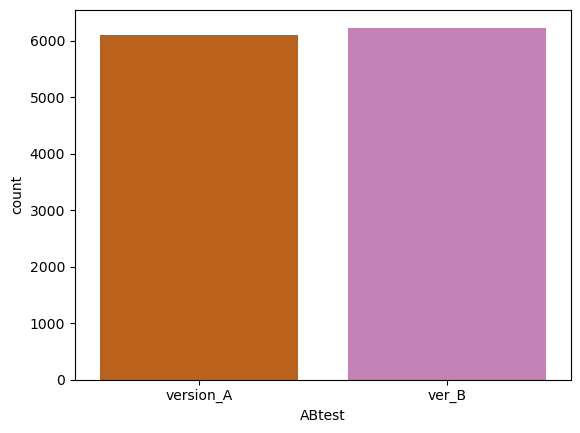

In [104]:
sns.countplot(x='ABtest', data=df_final,palette=my_cmap)

Above I used a function to create a visualization of my IV variable adding my own color palette.

/var/folders/6s/7szhx2dx0s591k39lzg6sgsh0000gn/T/ipykernel_5561/2771927554.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='test_version', data=df_final,palette=my_cmap)


<Axes: xlabel='test_version', ylabel='count'>

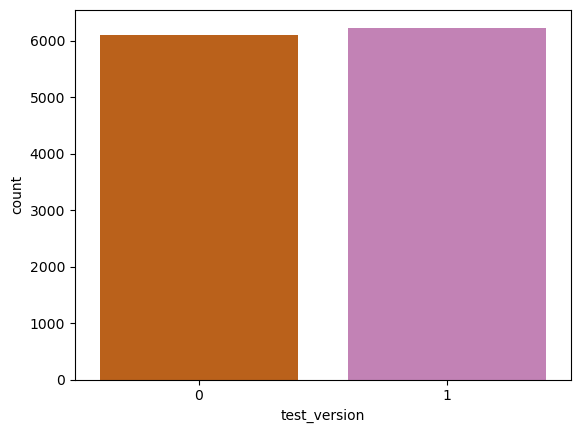

In [105]:
sns.countplot(x='test_version', data=df_final,palette=my_cmap)

I can see the graph is exactly the same if I change the variable from 'ABtest' to 'test_version' since it represents the same observations. 

In [106]:
my_cmap1= [sns.color_palette("colorblind")[2],
          sns.color_palette("colorblind")[9]]

/var/folders/6s/7szhx2dx0s591k39lzg6sgsh0000gn/T/ipykernel_5561/1185053691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cat_user_country', data=df_final, palette=my_cmap1)


<Axes: xlabel='cat_user_country', ylabel='count'>

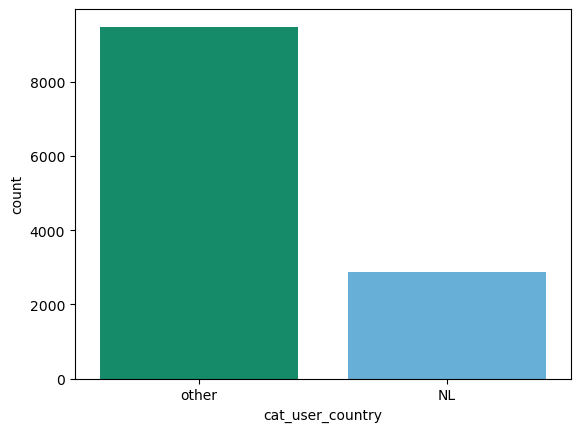

In [107]:
sns.countplot(x='cat_user_country', data=df_final, palette=my_cmap1)

Above I'm showing the observartions from the user_country categories.  

In [108]:
my_cmap2= [sns.color_palette("colorblind")[1],
          sns.color_palette("colorblind")[8]]

/var/folders/6s/7szhx2dx0s591k39lzg6sgsh0000gn/T/ipykernel_5561/3906071164.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='_purchase', data=df_final, palette=my_cmap2)


<Axes: xlabel='_purchase', ylabel='count'>

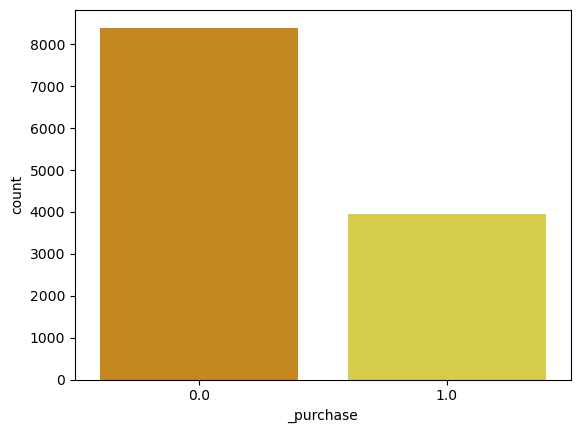

In [109]:
sns.countplot(x='_purchase', data=df_final, palette=my_cmap2) 

Above I can see the observations from the purchase category.

* Visualization of key bivariate relationships (e.g., related to hypotheses or RQs)

/var/folders/6s/7szhx2dx0s591k39lzg6sgsh0000gn/T/ipykernel_5561/3385521185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test_version', y='cat_user_country', data=df_final, palette=my_cmap2)


<Axes: xlabel='test_version', ylabel='cat_user_country'>

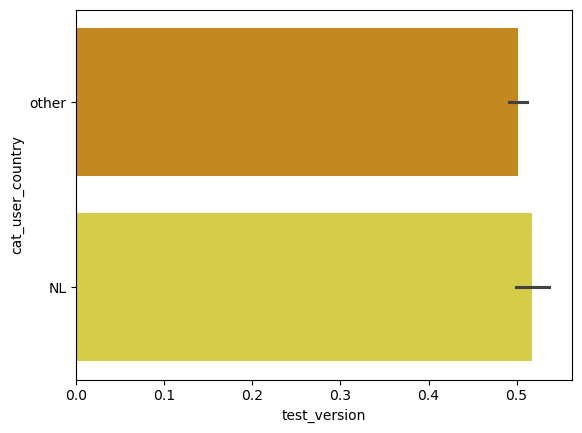

In [110]:
sns.barplot(x='test_version', y='cat_user_country', data=df_final, palette=my_cmap2)

/var/folders/6s/7szhx2dx0s591k39lzg6sgsh0000gn/T/ipykernel_5561/1951248250.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='original_version', y='cat_user_country', data=df_final, palette=my_cmap2)


<Axes: xlabel='original_version', ylabel='cat_user_country'>

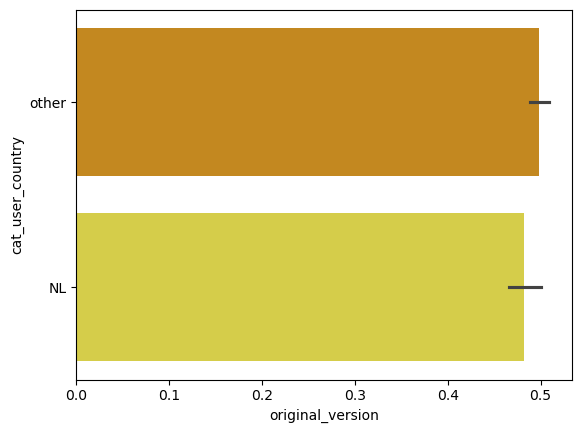

In [111]:
sns.barplot(x='original_version', y='cat_user_country', data=df_final, palette=my_cmap2)

In [112]:
df_final.groupby('ABtest')['_purchase'].sum()

ABtest
ver_B        3891.0
version_A      59.0
Name: _purchase, dtype: float64

Before continuing with my visualizations, I use ```.groupby``` function to calculate how many people made a purchase depending on the version of the website they were seeing and I can see there is a big difference in the number of purchases for ver_b (or test version) and version_A (or original version).

In [113]:
version = ['original version', 'test version']
counts = [59, 3891]

Text(0.5, 1.0, 'Relationship between AB test and purchases')

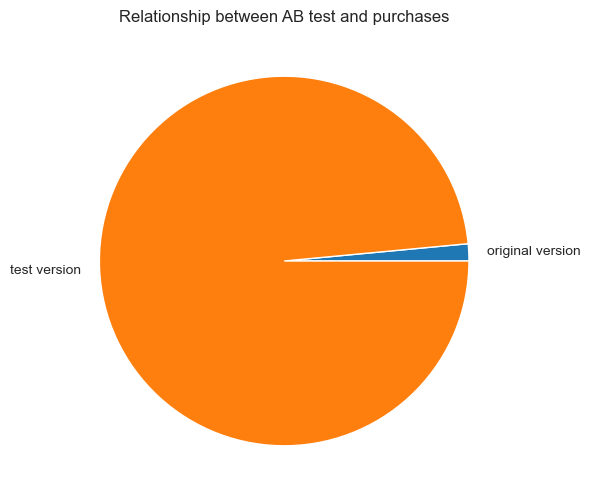

In [114]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.pie(counts, labels=version)
plt.title('Relationship between AB test and purchases')

This visualization indicates that the test version, or condition B seems to generate more purchases than the original version. 

To create this chart I followed the code provided in the seaborn webpage: https://pieriantraining.com/seaborn-pie-chart-a-tutorial-for-data-visualization/ 

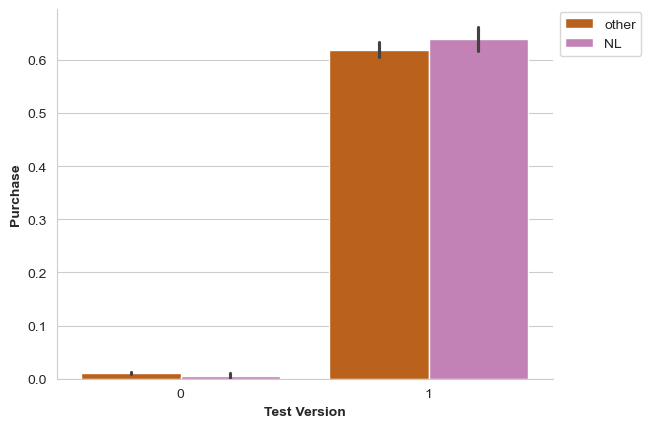

In [115]:
sns.barplot(x='test_version', y='_purchase', hue='cat_user_country', data=df_final, palette=my_cmap) 
sns.despine() 
plt.ylabel ('Purchase', weight="bold")
plt.xlabel ('Test Version', weight="bold")
plt.legend (bbox_to_anchor=(1., 1.01))

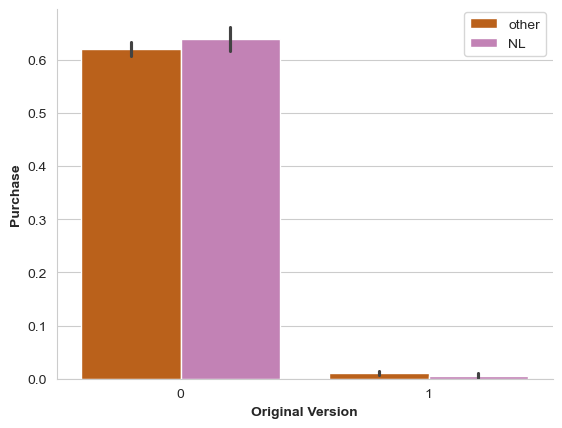

In [116]:
sns.barplot(x='original_version', y='_purchase', hue='cat_user_country', data=df_final, palette=my_cmap) 
sns.despine() 
plt.ylabel ('Purchase', weight="bold")
plt.xlabel ('Original Version', weight="bold")
plt.legend (bbox_to_anchor=(1., 1.01))

Above I'm using a barplot to visualize the difference in purchase between user country of origin for the experiment group first and the control group second. In both cases I can see that most purchases were made by dutch users. 

I got the functions to make this visualizations from the class tutorials from the Data Journalism course I took during the first semester.

In [117]:
df_final.groupby('ABtest')[['NL','other_country']].sum()

,NL,other_country
ABtest,,
ver_B,1484,4753
version_A,1383,4728


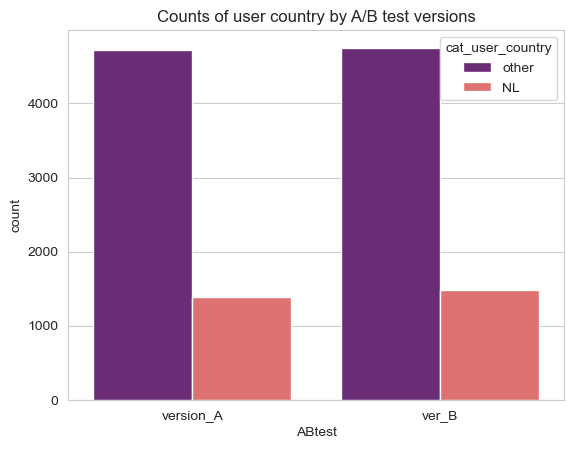

In [118]:
sns.countplot(x = 'ABtest', hue = 'cat_user_country', data = df_final, palette = 'magma')
plt.title('Counts of user country by A/B test versions')
plt.show()

Finally, I'm visualizing the country of each user by each version of the test. To do this visualization I used the code provided here: https://pythonbasics.org/seaborn-barplot/

* Writing a report-out to stakeholders summarising the findings of the data exploration (including what the data already show when it comes to the RQ & hypothesis, and potential risks of bias and unbalance)

* Checking the data for biases and unbalance (e.g., unequal distributed variables, missing cases)

#### Findings after data exploration

After examining these selected variables I've been able to see some initial findings. For example, there are some differences in the control and the experimental group. The second is a bit larger than the first, which means that slightly more users saw the test version (6237 vs. 6111). So there is a first imbalance here. Our DV is a binary variable representing users who made a purchase and users who didn't. If we look at the DV in relation to the A/B test, we can see that users who were in the experimental group, purchased a lot more than the ones who were not. Another important variable is the user country of origin since the condition we're testing is aimed at a non-dutch audience. Our preliminar results show that most users seeing the test version and making a purchase were dutch. Nevertheless there is also a large number of non-dutch users who also made a purchased in the experimental group, which could indicate some initial suport for our hypothesis.

A final note I wanted to make is on the variable **'time'**. Most of the values in this column are not provided, specifically 8398, which I filled wiht 'not provided'. I first thought it would be a relevant variable that could help explain user experience. However with so many missing values it is not possible to convert it to a numeric value and try to do a linear regression comparing it to the A/B test. Dropping the missing values from this column would also not make sense as we would lose a lot of the data. Therefore we will ignore the variable which as of now we see, it shouldn't have been included in the minimized df I created.

### Modeling and Hypothesis Testing



### Statistical testing 

I'm now going to test different models because we want to know which of the two models is better in predicting the data. We're going to compare them based on their performance, because the model is trying to predict if the user purchased or not.

The first step is to select a sample from my data to do the training of the model. This is going to be the training dataset. I will reserve the remaining part of the dataset, that I'll use to test the model later.

#### Model training

In [119]:
from sklearn.model_selection import train_test_split

We start by importing the train_test_split functin from scikit-learn. 

In [120]:
train, test = train_test_split(df_final, test_size=0.2, random_state=42)

Following the tutorial from DA6, I created one dataset called train and another one called test. They are the result of applying the function ```train_test_split```. For the **test data** I'm taking 20% of the cases of *df_final*, meaning that **train test** will have the other 80%. Finally I use ```random_state=42``` to ensure that my code is replicable, meaning that it's the same sample everytime. 

In [121]:
train.head()

,userid,sessioninfo_id,user_country_of_origin,geoNetwork_country,_purchase,time,ABtest,NL,other_country,cat_user_country,original_version,test_version
11122,14675,36982,NL,NL,1.0,20.0,ver_B,1,0,NL,0,1
1891,2466,24773,not provided,not provided,0.0,not provided,version_A,0,1,other,1,0
12166,16064,38371,DO,NL,0.0,not provided,version_A,0,1,other,1,0
11144,14709,37016,not provided,not provided,0.0,not provided,version_A,0,1,other,1,0
295,391,22698,NL,QA,0.0,not provided,version_A,1,0,NL,1,0


In [122]:
len(train)

9878

In [123]:
train.dtypes

userid                      int64
sessioninfo_id              int64
user_country_of_origin     object
geoNetwork_country         object
_purchase                 float64
time                       object
ABtest                     object
NL                          int64
other_country               int64
cat_user_country           object
original_version            int64
test_version                int64
dtype: object

In [124]:
test.head()

,userid,sessioninfo_id,user_country_of_origin,geoNetwork_country,_purchase,time,ABtest,NL,other_country,cat_user_country,original_version,test_version
4622,6141,28448,not provided,BT,0.0,not provided,version_A,0,1,other,1,0
6249,8266,30573,NL,EE,1.0,2.0,ver_B,1,0,NL,0,1
8332,11009,33316,not provided,NL,0.0,not provided,ver_B,0,1,other,0,1
5684,7522,29829,NL,EE,1.0,8.16,ver_B,1,0,NL,0,1
1197,1571,23878,not provided,NL,0.0,not provided,ver_B,0,1,other,0,1


In [138]:
len(test)

2470

Above I'm just looking at how my datsets look like and their length. I can see that indeed the **test** dataset is smaller than the train, as it only contains 20% of the cases. So what we just did now is to split the data. 

#### Probabilities for leaving the website using Logistic Regression

In [130]:
train.loc[train['ABtest'] == 'version_A', 'ABtest'] = 0
train.loc[train['ABtest'] == 'ver_B', 'ABtest'] = 1
train['ABtest'].value_counts()

ABtest
1    4988
0    4890
Name: count, dtype: int64

In [132]:
train.dtypes

userid                      int64
sessioninfo_id              int64
user_country_of_origin     object
geoNetwork_country         object
_purchase                 float64
time                       object
ABtest                     object
NL                          int64
other_country               int64
cat_user_country           object
original_version            int64
test_version                int64
dtype: object

In [134]:
train['ABtest'] = train['ABtest'].apply(pd.to_numeric)
train.dtypes

userid                      int64
sessioninfo_id              int64
user_country_of_origin     object
geoNetwork_country         object
_purchase                 float64
time                       object
ABtest                      int64
NL                          int64
other_country               int64
cat_user_country           object
original_version            int64
test_version                int64
dtype: object

Before creating my model I need to make sure that my IV is numerical. Therefore I converted the values for 'version_A'and 'ver_B' in the column **'ABtest'** into 0 and 1. So if the result of the test was 'version_A', the new value in the column will be 0, and if the result of the test was 'ver_B', the new value in the column will be 1. When I check the new values, I see the function worked*. But when I check the type of data I see the variable still shows as an object. So I need to convert it to numerical.

*I looked up how to replace the values in a column and I got the code from: https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/ 

In [135]:
target = '_purchase'
features = ['ABtest']

Above I'm creating my model, following DA6 tutorial. The target is my DV and the features is my IV. Since they are both **binary variables** I will be doing a **logistic regression**.

In [136]:
logit_stats = sm.Logit(train[target], sm.add_constant(train[features]))

In [137]:
result_logit = logit_stats.fit()

Optimization terminated successfully.
         Current function value: 0.362631
         Iterations 9


In [138]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:              _purchase   No. Observations:                 9878
Model:                          Logit   Df Residuals:                     9876
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                  0.4215
Time:                        18:17:56   Log-Likelihood:                -3582.1
converged:                       True   LL-Null:                       -6192.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5726      0.142    -32.168      0.000      -4.851      -4.294
ABtest         5.0779      0.145     34.990      0.000       4.793       5.362


Above I can see the result of the logistic regression where I'm testing the model to answer my hypothesis. I can see that it is statistically significant, X2(-4.5412) = 0.00, p = 0.000. So it seems the condition affects positively to the increase of purchases. Therefore we can **support H1**. 

But let's see what happens if I add other control variables:

In [139]:
train.loc[train['cat_user_country'] == 'NL', 'cat_user_country'] = 0
train.loc[train['cat_user_country'] == 'other', 'cat_user_country'] = 1
train['cat_user_country'].value_counts()

cat_user_country
1    7563
0    2315
Name: count, dtype: int64

In [140]:
train['cat_user_country'] = train['cat_user_country'].apply(pd.to_numeric)
train.dtypes

userid                      int64
sessioninfo_id              int64
user_country_of_origin     object
geoNetwork_country         object
_purchase                 float64
time                       object
ABtest                      int64
NL                          int64
other_country               int64
cat_user_country            int64
original_version            int64
test_version                int64
dtype: object

Above I'm transforming again one of my IV, just like I did before with 'ABtest'. In this case I'm converting 'cat_user_country' so that the value 'NL' is equal to 0 and 'other' to 1. I also converted this variable into a numerical one to be able to perform the logistic regression.

In [141]:
features_controls = ['ABtest', 'cat_user_country']

In [142]:
logit_stats_user = sm.Logit(train[target], sm.add_constant(train[features_controls]))

In [143]:
result_logit_user = logit_stats_user.fit()

Optimization terminated successfully.
         Current function value: 0.362612
         Iterations 9


In [144]:
print(result_logit_user.summary())

                           Logit Regression Results                           
Dep. Variable:              _purchase   No. Observations:                 9878
Model:                          Logit   Df Residuals:                     9875
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                  0.4216
Time:                        18:20:34   Log-Likelihood:                -3581.9
converged:                       True   LL-Null:                       -6192.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.5412      0.151    -30.045      0.000      -4.837      -4.245
ABtest               5.0777      0.145     34.989      0.000       4.793       5.362
cat_user_country    -0.0410 

Above I can see the results of the model adding a control variable like the country of origin of the user. However the p-value, 0.542, shows that this variable is not statistically significant, therfore it doesn't seem to have an effect on the purchases. 

#### So which model fits the data best?

Following the tutorial from DA6, it is advised to not rely on the Pseudo R2, however we can do it for this assignment. If we look at this statistic we can see that there was no improvement, because the model fit remains almost exacty the same, meaning that the country of origin of the user doesn't have any effect, X2 (-4.5412) = 0.00, p = 0.542.

So in summary, adding a control variable didn't have an effect on R2, meaning that the first model is better.

#### Using Supervised Machine Learning¶

Now we're going to do the same we did but with SML. The next section is also based on all the steps taught during DA6.

In [152]:
logit_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [153]:
features

['ABtest']

In [154]:
target

'_purchase'

In [160]:
logit_clf.fit(train[features], train[target])

LogisticRegression(max_iter=1000)

In [158]:
logit_clf.predict_proba([[0]])

/Users/bertaolivier/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.9887571, 0.0112429]])

Above I want to see what happens when we predict the ABtest to be 0. In this case, the probability for control group to purchase is 98% and for test group 1% to not to purchase.

In [159]:
logit_clf.predict_proba([[1]])

/Users/bertaolivier/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.37730107, 0.62269893]])

If we predictt ABtest to be 1, in this case, the probability for control group to purchase is 37% and for test group 62%.

In [162]:
logit_clf_user = LogisticRegression(max_iter=1000, fit_intercept = True)

In [163]:
features_controls

['ABtest', 'cat_user_country']

In [164]:
target

'_purchase'

In [165]:
logit_clf_user.fit(train[features_controls], train[target])

LogisticRegression(max_iter=1000)

In [167]:
logit_clf_user.predict_proba([[1,0]])

/Users/bertaolivier/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.37001654, 0.62998346]])

In the code above I'm testing what happens when the user is seeing the **test version** but **is from the NL**. The probability of a purchase would be 62%. 

In [168]:
logit_clf_user.predict_proba([[0,1]])

/Users/bertaolivier/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98886255, 0.01113745]])

In the code above I'm testing what happens when the user is seeing the **original version** but is **not from the NL**. The probability of a purchase would be of 1%. 

In [171]:
logit_clf_user.predict_proba([[1,1]])

/Users/bertaolivier/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.37958312, 0.62041688]])

If we see the prediction for a user that is seeing the **test version** and is **not from the NL**, we see there is also a 62% chance of purchasing.

In [170]:
logit_clf_user.predict_proba([[0,0]])

/Users/bertaolivier/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98840381, 0.01159619]])

Lastly, if the user is seeing the **original version** and is **from the NL**, the probability of a purchase would be of 1%.

All in all this model is also showing that the user country of origin is not relevant for purchases.

#### Using LIME

In [190]:
data_lime_purchase = train[['_purchase', 'ABtest']]

In [191]:
class_names_purchase = data_lime_purchase.columns
X_data_lime_purchase = data_lime_purchase[['ABtest']].to_numpy()
y_data_lime_purchase = train['_purchase'].to_numpy()

In [192]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_data_lime_purchase, 
    feature_names=class_names_purchase, 
    verbose=True, 
    mode='classification')

In [193]:
print(X_data_lime_purchase[500])
exp = explainer.explain_instance(X_data_lime_purchase[500], logit_clf.predict_proba)
exp.show_in_notebook(show_table=True)

[1]
Intercept 0.01184446448816917
Prediction_local [0.62245767]
Right: 0.6226989264370425


/Users/bertaolivier/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Above and following DA6, I'm using **lime tabular** to visualise the prediction probabilities. We randomly asked to look at the value number 500 of the dataset. In this row we can see the user made a purchase (=1), and the model predicted 38% probabilities to not make a purchase and 62% to make it. 

#### Comparing the Supervised Machine Learning models

The next step is to compare the performance of the two models but this time using the test set. So what we're going to do is to ask each model to make predictions about purchases. 

In [207]:
test.dtypes

userid                      int64
sessioninfo_id              int64
user_country_of_origin     object
geoNetwork_country         object
_purchase                 float64
time                       object
ABtest                     object
NL                          int64
other_country               int64
cat_user_country           object
original_version            int64
test_version                int64
dtype: object

In [208]:
test.loc[test['ABtest'] == 'version_A', 'ABtest'] = 0
test.loc[test['ABtest'] == 'ver_B', 'ABtest'] = 1
test['ABtest'].value_counts()

ABtest
1    1249
0    1221
Name: count, dtype: int64

In [210]:
test['ABtest'] = test['ABtest'].apply(pd.to_numeric)
test.dtypes

userid                      int64
sessioninfo_id              int64
user_country_of_origin     object
geoNetwork_country         object
_purchase                 float64
time                       object
ABtest                      int64
NL                          int64
other_country               int64
cat_user_country           object
original_version            int64
test_version                int64
dtype: object

In [211]:
test.loc[test['cat_user_country'] == 'NL', 'cat_user_country'] = 0
test.loc[test['cat_user_country'] == 'other', 'cat_user_country'] = 1
test['cat_user_country'].value_counts()

cat_user_country
1    1918
0     552
Name: count, dtype: int64

In [212]:
test['cat_user_country'] = test['cat_user_country'].apply(pd.to_numeric)
test.dtypes

userid                      int64
sessioninfo_id              int64
user_country_of_origin     object
geoNetwork_country         object
_purchase                 float64
time                       object
ABtest                      int64
NL                          int64
other_country               int64
cat_user_country            int64
original_version            int64
test_version                int64
dtype: object

What I'm doing above is to make sure the variables I'm using in the models are numeric and categorical, just like I did with the train set earlier. 

In [225]:
test['predicted_purchase'] = logit_clf.predict(test[features])

In [226]:
test['predicted_purchase'].value_counts()

predicted_purchase
1.0    1249
0.0    1221
Name: count, dtype: int64

The model predicted that 1249 would be a purchase and 1221 would not. 

In [229]:
test[['_purchase', 'predicted_purchase']].head()

,_purchase,predicted_purchase
4622,0.0,0.0
6249,1.0,1.0
8332,0.0,1.0
5684,1.0,1.0
1197,0.0,1.0


Above I'm comparing the actual variable, with the prediction. So we can see that the model was only wrong in two cases.

In [230]:
test['predicted_purchase_cont'] = logit_clf_user.predict(test[features_controls])

In [231]:
test['predicted_purchase_cont'].value_counts()

predicted_purchase_cont
1.0    1249
0.0    1221
Name: count, dtype: int64

Above I have the second model, in this case it contains the control variable, which is the country of origin of the user. But we can see it's predicting the same number of purchases and non-purchases as the first model.

In [233]:
test[['_purchase', 'predicted_purchase', 'predicted_purchase_cont']].head()

,_purchase,predicted_purchase,predicted_purchase_cont
4622,0.0,0.0,0.0
6249,1.0,1.0,1.0
8332,0.0,1.0,1.0
5684,1.0,1.0,1.0
1197,0.0,1.0,1.0


Now I'm comparing this second model to the first and the real variable. We can see the second model is making more mistakes than the first. But we can not be sure yet as we're only seeing the first cases.

#### Creating a confusion matrix

So the way to compare them is by creating a confusion matrix as taught in DA6.

In [234]:
from sklearn.metrics import confusion_matrix

In [235]:
print(confusion_matrix(test['_purchase'], test['predicted_purchase']))

[[1212  469]
 [   9  780]]


If we read the confusion matrix we can see we had 1212 cases that were really predicted as negative and that they were actually a 0 (**not a purchase**). Then, 780 cases in the test set were a purchase for real (=1), but there were 469 cases which the model predicted as a purchase even though they were not. And there were 9 cases that were a false negative, meaning that they were a purchase (=1) but the model predicted as 0. In the columns I have the predictions and in the rows I have the actual value of the variable.

So we see that there are **780 true positives** and **1212 true negatives**, which is goot. However there is also a large number of **false positives,469**, but a very low number of **false negatives, only 9**. 

In [236]:
print(confusion_matrix(test['_purchase'], test['predicted_purchase_cont']))

[[1212  469]
 [   9  780]]


When adding the control variable, the confusion matrix result is exactly the same, meaning that this variable doesn't have any effect. 

I'm now going to calculate **Precision and Recall**. 

In [237]:
from sklearn.metrics import classification_report

In [239]:
print(classification_report(test['_purchase'], test['predicted_purchase']))

              precision    recall  f1-score   support

         0.0       0.99      0.72      0.84      1681
         1.0       0.62      0.99      0.77       789

    accuracy                           0.81      2470
   macro avg       0.81      0.85      0.80      2470
weighted avg       0.88      0.81      0.81      2470



If I look at the first model I can see its very good in precising 1 and also 0 and in recalling too. If we look at f1-score it also seems like the model is generally good.

In [240]:
print(classification_report(test['_purchase'], test['predicted_purchase_cont']))

              precision    recall  f1-score   support

         0.0       0.99      0.72      0.84      1681
         1.0       0.62      0.99      0.77       789

    accuracy                           0.81      2470
   macro avg       0.81      0.85      0.80      2470
weighted avg       0.88      0.81      0.81      2470



If I look at the precision & recall of the second model, I cannot see any differences from the first, so again I can see that the control variable is not having any effect in the model.

#### Another way to split the data

If I move away from logistic regression, which is basically splitting the cases in two and looking at which are most likely to purchase and which are not, we can also create **decision trees**. To do these I'm following the final steps from DA6.

In [241]:
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree._export import plot_tree

Above I'm importing the packages that will allow me to create and see the trees.

In [242]:
dt_clf = DecisionTreeClassifier()

I'm creating another classifier, but in this case for a decision tree.

In [243]:
dt_clf.fit(train[features], train[target])

DecisionTreeClassifier()

In [244]:
features

['ABtest']

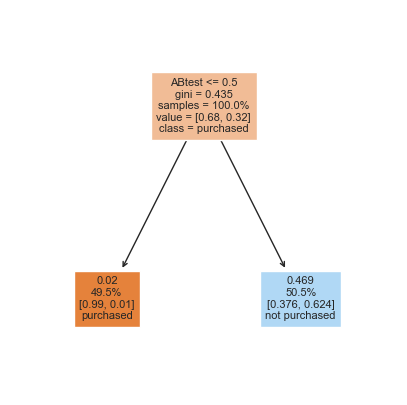

In [246]:
plt.figure(figsize=(5,5))
plot_tree(dt_clf, proportion=True, label='root', 
          feature_names=['ABtest'], class_names=['purchased', 'not purchased'], filled=True, fontsize=8)
plt.show()

The commands and function from above are copied from the tutorial notebook in DA6. What I can see in this decision tree is first that ABtest is 0, meaning that is the **original version** of the website. So here the probabilities of not purchasing are 0.47% and of purchasing are 2%. But this information tree is not giving us a lot of information. It's also done only on the basis of the DV, so it doesn't contain any control variables.

In [248]:
test['predicted_purchase_DT'] = dt_clf.predict(test[features])

In [249]:
dt_clf_user = DecisionTreeClassifier()

In [250]:
features_controls

['ABtest', 'cat_user_country']

In [251]:
dt_clf_user.fit(train[features_controls], train[target])

DecisionTreeClassifier()

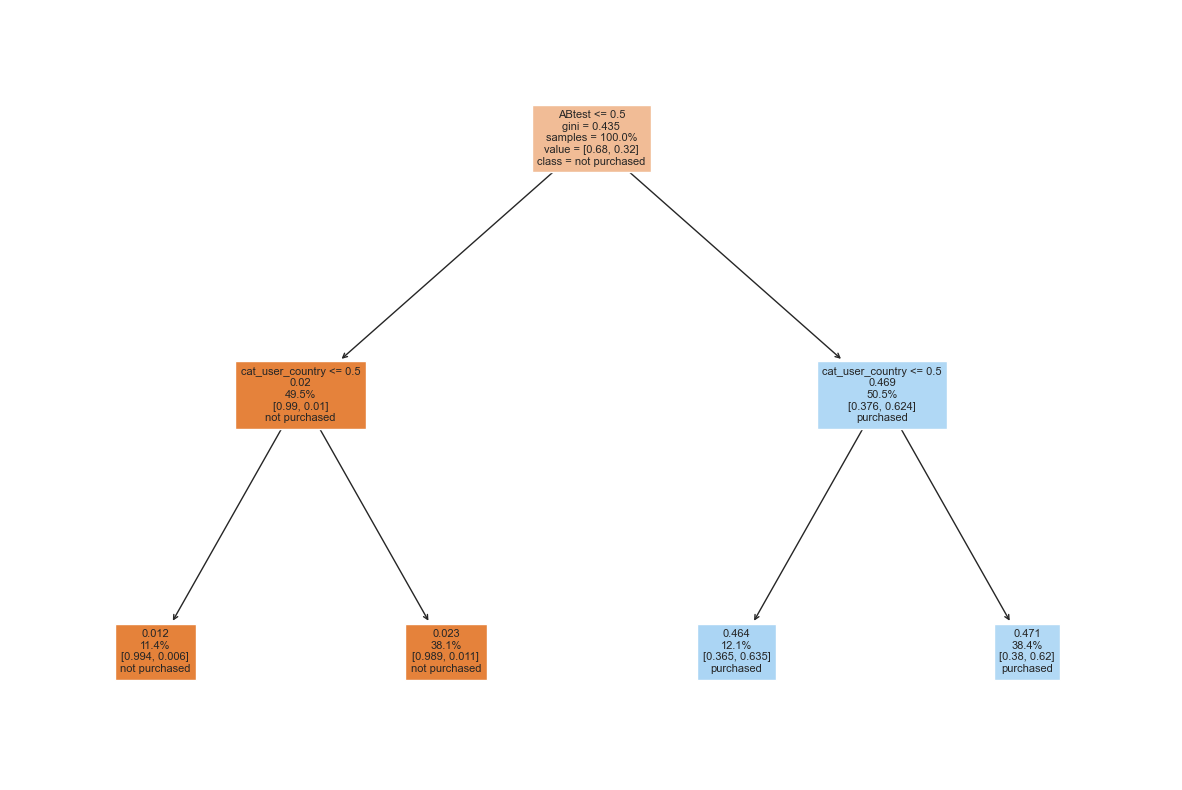

In [256]:
plt.figure(figsize=(15,10))
plot_tree(dt_clf_user, proportion=True, 
          label='root', 
          feature_names=['ABtest', 'cat_user_country'], 
          class_names=['not purchased','purchased'],                                  
          filled=True, fontsize=8)
plt.show()

Above I created a more complex decision tree, this time adding the control variable. This tree displays some more predictions than before. 

### Evaluation

The objective of this report was to answer the following research question: To what extent does the addition of a new tab offering an English version of Cineville increase user subscriptions? Assuming that the version providing website information in English would attract more subscribers because beyond the Dutch, more would find this option easier and quicker. After conducting the A/B test that presented these two options, we conducted a logistic regression using the variable AB (composed of each version of the website) as the independent variable and the variable "purchases" as the dependent variable. The regression was significant with X2 = -4.5412, p = 0.000 so we can support the hypothesis. Nevertheless looking at the  pseudo R-squared ( = 0.4216), it indicates that the relationship between these two variables is weak and that this model is not really fit for the data. So even if the hypothesis is supported, it’s not advised the organization changes the main menu in the website to add a tab offering the english version. We do this recommendation also based on the second logistic regression we performed in which we included a control variable in the model. In this case the country of origin of the user. As explained in the beginning we thought changing this feature would have more impact in subscriptions from non-dutch users, however, the result of the regression showed that this variable was not statistically significant (p-value = 0.542) which means it doesn’t have an effect on purchases. Therefore it’s better to maintain the website the way it is.


### Limitations and Next Steps

This research was very limited from the beginning because I couldn’t find relevant control variables. Some of the variables I first thought would be useful turned out to not be that useful. I already explained in the previous section, but time spent on the website would have been a useful variable, however it had too many missing values making it hard to really use it. The goal was to see how time and purchases related to each of the A/B test versions but this didn’t happen in the end. The same happened with the variable geonetwork country, which I wanted to use in the beginning but didn’t end up using because I didn’t think it had a lot of sense since it showed the IP location of the user but this didn’t really have a lot of meaning knowing we already had the variable country origin of the user, which seems a lot more accurate. And later on during the model testing it was very clear from the beginning that adding the only control variable I had didn’t have any impact on the outcome, making it little interesting to keep comparing or trying new models. I think it would have been much more interesting and insightful to have more control variables that were more closely related to the feature I was trying to test, so the dataset was limited in that sense. 
So for a future study, the dataset should be much more precise in variables that help operationalising user experience such as time or clicks, but it would also be interesting to perform tests with other features. For example just having a click button that converts every page of the website into English.

### Ethical and Normative Considerations

After seeing the numerous limitations of this study, we can conclude that it is difficult for the organization to make a firm decision, and that it would be necessary to continue conducting deeper studies that consider new variables that have not been analyzed here. This example, however, demonstrates one of the obstacles of algorithmic models, which is competing for biased results due to a possible biased design as well (Saltz & Dewar, 2019). This also reminds us of the need for human supervision when processing data to ensure correct responses (Larose, 2014).
This study also shows us the difficulty of obtaining quality and complete data, which has an undeniable impact on the quality of the information and, therefore, the results we will obtain (Possler, Bruns & Niemann-Lenz, 2019). In any case, I believe that one of the most important considerations for the company is that, in the event of continuing to conduct studies that collect data from its users to improve the access and navigation of its website, they always guarantee the privacy of these users, as it is a fundamental right (Tucker, 2019), and furthermore, allow them to choose through the first cookies whether they want their information to be processed or not.

### References

If you use scientific papers, cite them using APA style (and add a reference section at the end). If you are using pieces of code written by someone else, add a comment in the appropriate section and add a link to the source.

Regarding the tools we used:

* Sentiment analysis was done using SentiStrength. The following paper can be cited:
    * Thelwall, M., Buckley, K., Paltoglou, G., Cai, D., & Kappas, A. (2010). Sentiment strength detection in short informal text. Journal of the American Society for Information Science and Technology, 61(12), 2544-2558.
  
* Tweets were collected using DMI-TCAT. The following paper can be cited:
   * Borra, E., & Rieder, B. (2014). Programmed method: developing a toolset for capturing and analyzing tweets. Aslib Journal of Information Management, 66(3), 262-278.

* International Organization for Standardization (2010). Ergonomics of human-system interaction — Part 210: Human-centered design for interactive systems. From: https://www.iso.org/obp/ui/#iso:std:iso:9241:-210:ed-1:v1:en
  
* Larose, D. T. (2014). Discovering knowledge in data: an introduction to data mining. John Wiley & Sons.

* Morville, P., & Rosenfeld, L. (2006). Information architecture for the World Wide Web. *The Library Quarterly (Chicago), 73(3)*, 353–355. https://doi.org/10.1086/603425
  
* Possler, D., Bruns, S., & Niemann-Lenz, J. (2019). Data Is the New Oil--But How Do We Drill It? Pathways to Access and Acquire Large Data Sets in Communication Science. International Journal of Communication, 13, 3894–3911. 
  
* Saltz, J. S., & Dewar, N. (2019). Data science ethical considerations: A systematic literature review and proposed project framework. Ethics and Information Technology, 21(3), 197–208. http://dx.doi.org/10.1007/s10676-019-09502-5 

* Tucker, C. (2019). Privacy, Algorithms, and Artiﬁcial Intelligence. In A. Agrawal, J. Gans, & A. Goldfarb (Eds.), The Economics of Artificial Intelligence: An Agenda (pp. 423–437). University of Chicago Press.